In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

Lien du dataset : https://www.kaggle.com/code/mohammednamory/network-intrusion-detection-problem/data?select=cicids_static_data.csv

In [2]:
path = r"D:/TRAVAIL/Inge_3/Projet - Prédiction du type d’application Internet dans le contexte de traffic chiffré/data/"

In [3]:
df = pd.read_csv(path + "cicids_static_data.csv")

In [4]:
TARGET = "Label"

In [5]:
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,53,159,2,2,68,266,34,34,34.000000,0.000000,...,20,0.00000,0.0000,0,0,0.000,0.000,0,0,BENIGN
1,53,51673,2,2,90,166,45,45,45.000000,0.000000,...,32,0.00000,0.0000,0,0,0.000,0.000,0,0,BENIGN
2,7496,43,1,1,0,6,0,0,0.000000,0.000000,...,40,0.00000,0.0000,0,0,0.000,0.000,0,0,ATTACK
3,46564,61,1,1,6,6,6,6,6.000000,0.000000,...,20,0.00000,0.0000,0,0,0.000,0.000,0,0,BENIGN
4,80,69,2,0,0,0,0,0,0.000000,0.000000,...,20,0.00000,0.0000,0,0,0.000,0.000,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25186,50100,197,1,1,6,6,6,6,6.000000,0.000000,...,20,0.00000,0.0000,0,0,0.000,0.000,0,0,BENIGN
25187,3390,48,1,1,0,6,0,0,0.000000,0.000000,...,40,0.00000,0.0000,0,0,0.000,0.000,0,0,ATTACK
25188,123,117,2,2,96,96,48,48,48.000000,0.000000,...,32,0.00000,0.0000,0,0,0.000,0.000,0,0,BENIGN
25189,443,116260101,28,25,1809,16411,961,0,64.607143,202.023897,...,20,75753.33333,143185.4198,530428,34284,9612588.083,1389284.644,10000000,5201068,BENIGN


# Data cleaning

### 1. Enlever les lignes en double

In [6]:
df_clean = df.drop_duplicates()

In [7]:
# Nb de lignes supprimées
len(df) - len(df_clean)

433

### 2. Enlever les colonnes dont les valeurs sont identiques

In [8]:
def drop_unused_columns(df):
    unused_columns = df.columns[df.nunique() <= 1]
    return df.drop(unused_columns, axis=1) 

df_clean = drop_unused_columns(df_clean)

print("Colonnes supprimées :")
for i in range (len(df.columns)):
    if df.columns[i] not in df_clean.columns:
        print(df.columns[i])

Colonnes supprimées :
 Bwd PSH Flags
 Bwd URG Flags
Fwd Avg Bytes/Bulk
 Fwd Avg Packets/Bulk
 Fwd Avg Bulk Rate
 Bwd Avg Bytes/Bulk
 Bwd Avg Packets/Bulk
Bwd Avg Bulk Rate


### 3. Encoding

In [9]:
encoder = LabelEncoder()
df_clean["Label"] = encoder.fit_transform(df_clean["Label"])

### 4. Vérification de l'existence de valeurs manquantes

In [10]:
df_clean.isna().sum().sum()

5

In [11]:
for col in df_clean:
    if (df_clean[col].isna().sum() != 0):
        print(df_clean[col].isna().sum(), '  ', col)

5    Flow Bytes/s


In [12]:
df_clean = df_clean.dropna()

### 5. Rename

In [39]:
df_clean = df_clean.rename(str.strip, axis='columns')

### 6. Enlever les valeurs infinies

In [76]:
for col in df_clean:
    df_clean = df_clean[df_clean[col] != np.inf]

### 7. Type vérification

In [41]:
df_clean.dtypes

Destination Port                 int64
Flow Duration                    int64
Total Fwd Packets                int64
Total Backward Packets           int64
Total Length of Fwd Packets      int64
                                ...   
Idle Mean                      float64
Idle Std                       float64
Idle Max                         int64
Idle Min                         int64
Label                            int32
Length: 71, dtype: object

In [42]:
categorical = [var for var in df_clean.columns if df_clean[var].dtype=='float64']
categorical

['Fwd Packet Length Mean',
 'Fwd Packet Length Std',
 'Bwd Packet Length Mean',
 'Bwd Packet Length Std',
 'Flow Bytes/s',
 'Flow Packets/s',
 'Flow IAT Mean',
 'Flow IAT Std',
 'Fwd IAT Mean',
 'Fwd IAT Std',
 'Bwd IAT Mean',
 'Bwd IAT Std',
 'Fwd Packets/s',
 'Bwd Packets/s',
 'Packet Length Mean',
 'Packet Length Std',
 'Packet Length Variance',
 'Average Packet Size',
 'Avg Fwd Segment Size',
 'Avg Bwd Segment Size',
 'Active Mean',
 'Active Std',
 'Idle Mean',
 'Idle Std']

### Save

In [92]:
df_clean.to_csv(path +'dataset_clean.csv', index=False)

In [44]:
df_clean

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,53,159,2,2,68,266,34,34,34.000000,0.000000,...,20,0.00000,0.0000,0,0,0.000,0.000,0,0,1
1,53,51673,2,2,90,166,45,45,45.000000,0.000000,...,32,0.00000,0.0000,0,0,0.000,0.000,0,0,1
2,7496,43,1,1,0,6,0,0,0.000000,0.000000,...,40,0.00000,0.0000,0,0,0.000,0.000,0,0,0
3,46564,61,1,1,6,6,6,6,6.000000,0.000000,...,20,0.00000,0.0000,0,0,0.000,0.000,0,0,1
4,80,69,2,0,0,0,0,0,0.000000,0.000000,...,20,0.00000,0.0000,0,0,0.000,0.000,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25186,50100,197,1,1,6,6,6,6,6.000000,0.000000,...,20,0.00000,0.0000,0,0,0.000,0.000,0,0,1
25187,3390,48,1,1,0,6,0,0,0.000000,0.000000,...,40,0.00000,0.0000,0,0,0.000,0.000,0,0,0
25188,123,117,2,2,96,96,48,48,48.000000,0.000000,...,32,0.00000,0.0000,0,0,0.000,0.000,0,0,1
25189,443,116260101,28,25,1809,16411,961,0,64.607143,202.023897,...,20,75753.33333,143185.4198,530428,34284,9612588.083,1389284.644,10000000,5201068,1


# Data processing

In [46]:
import plotly.express as px

lst = [['ATTACK', len(df_clean[df_clean['Label']==0])], 
      ['BENIGN', len(df_clean[df_clean['Label']==1])]]
    
df_chart = pd.DataFrame(lst, columns =['Label', 'Nombre'])

fig = px.pie(df_chart, values='Nombre', names='Label', title='Répartition')
fig.show()

# Corrélation des colonnes

### Matrice de corrélation

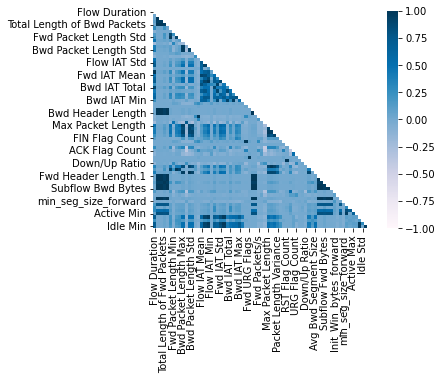

In [47]:
def save_matrix_in_excel(mat_corr):
    df = pd.DataFrame(mat_corr)
    df.to_excel('correlation_matrix.xlsx', index=False)

def correlation_matrix(df):
    mat_corr = df.iloc[:, 1:-1].corr()
    mask = np.zeros_like(mat_corr, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(mat_corr, mask=mask, cmap="PuBu", vmin=-1, vmax=1, center=0, square=True)
    #plt.show()
    save_matrix_in_excel(mat_corr)
    
correlation_matrix(df_clean)

### Random Forest

In [48]:
df_clean.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd URG Flags',
       'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s',
       'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length',
       'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance',
       'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count',

In [73]:
df_clean_2 = df_clean[['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s',
                        "Label"]]
#'Flow Bytes/s',
df_clean_2

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Label
0,53,159,2,2,68,266,34,34,34.000000,0.000000,133,133,133.00,0.000000,2.100629e+06,1
1,53,51673,2,2,90,166,45,45,45.000000,0.000000,83,83,83.00,0.000000,4.954231e+03,1
2,7496,43,1,1,0,6,0,0,0.000000,0.000000,6,6,6.00,0.000000,1.395349e+05,0
3,46564,61,1,1,6,6,6,6,6.000000,0.000000,6,6,6.00,0.000000,1.967213e+05,1
4,80,69,2,0,0,0,0,0,0.000000,0.000000,0,0,0.00,0.000000,0.000000e+00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25186,50100,197,1,1,6,6,6,6,6.000000,0.000000,6,6,6.00,0.000000,6.091371e+04,1
25187,3390,48,1,1,0,6,0,0,0.000000,0.000000,6,6,6.00,0.000000,1.250000e+05,0
25188,123,117,2,2,96,96,48,48,48.000000,0.000000,48,48,48.00,0.000000,1.641026e+06,1
25189,443,116260101,28,25,1809,16411,961,0,64.607143,202.023897,2005,0,656.44,775.462071,1.567176e+02,1


In [93]:
def random_forest(df):
    X = df.drop(TARGET, axis=1)
    y = df[TARGET]

    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.3)
    rf = RandomForestRegressor(n_estimators=50)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    # Evaluate
    rmse_test = MSE(y_test, y_pred) ** (1 / 2)
    print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

    # Chart
    importances_rf = pd.Series(rf.feature_importances_, index=X.columns)
    sorted_importances_rf = importances_rf.sort_values()
    sorted_importances_rf = sorted_importances_rf[-10:]
    print(sorted_importances_rf)
    sorted_importances_rf.plot(kind='barh', color='lightgreen')
    plt.show()
    return None

Test set RMSE of rf: 0.04
Init_Win_bytes_forward         0.019939
Total Length of Fwd Packets    0.028099
Bwd Header Length              0.031373
Destination Port               0.034786
Subflow Fwd Bytes              0.040185
Packet Length Std              0.044603
Packet Length Variance         0.056807
Bwd Packets/s                  0.077294
Average Packet Size            0.102720
Bwd Packet Length Std          0.430775
dtype: float64


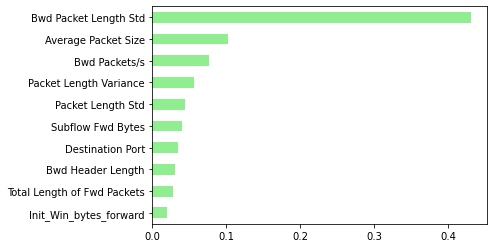

In [94]:
random_forest(df_clean)